#Causal AI and ML
##Assignment 2
###Question 2

In this problem, you need to write code in a Jupyter notebook to estimate the graphical structure of a model
from the given dataset. The data is given in the attached file named “dataset.csv”. The causal model is
Markovian, that is, it does not have any unobserved confounders.
You are allowed to use existing libraries to write the solution to this problem. Also, you can code your
solution without the help of any packages. You are allowed to use either Python or R to write code. You can
follow the causal discovery coding example that we discussed in class.
1. Load and display the given dataset from the file. [0.5 point]
2. Use the PC algorithm to estimate an equivalence class for the given dataset. Please use 𝛼 = 0.05 in your
conditional independence tests. Plot the graph. [1 point]
3. Use the GES algorithm to estimate an equivalence class for the given dataset. Plot the graph. [1 point]
4. The PC and GES algorithms estimate CPDAGs. There are some edges in CPDAGs associated with the
answer to question (1) and (2) that are not oriented. Let’s say we assume that the data was generated by
an additive noise model. In that case, we can test each undirected edge under the assumption that the
function is either non-linear or that the unobserved parent is non-Gaussian. With these assumptions, let’s
say we found that the edge between F and B nodes can be oriented as F→B. Now, given this information
draw all possible causal graphs. [1 point

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
!pip install graphviz
!apt install libgraphviz-dev
!pip install pygraphviz

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

!pip install causalgraphicalmodels
from causalgraphicalmodels import CausalGraphicalModel
from causalgraphicalmodels.examples import fork, chain, collider

!pip install causal-learn

from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.cit import fisherz
import statsmodels
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Q1

In [3]:
data = pd.read_csv('/content/drive/My Drive/Dataset/dataset2.csv')
print(data)

              a         b         c         d         e         f         g
0     -0.160288 -0.284273  0.329835  0.580409  0.290660 -0.129441  0.279238
1      0.167446  1.553072 -1.684178  0.248919  0.271667  0.454602  0.550966
2     -0.481466  0.318975  0.033325  0.440888 -0.518865  0.038540 -0.253289
3      0.679650  2.499745 -0.627434  0.224881  0.655549  0.708412  0.192088
4      0.723526 -1.829126 -1.313232  0.767057 -0.402993 -0.753407 -0.197136
...         ...       ...       ...       ...       ...       ...       ...
99995 -0.810889  1.092316  0.202198  0.878631  0.210047  0.173791  0.384489
99996 -0.156954 -2.361714 -0.686803  0.624103 -0.329003 -0.824205  0.137536
99997  0.706541  2.819210 -0.086552  0.452939  0.949799  0.851835  0.988266
99998 -0.334048  7.181633  1.119834  0.900276  1.383060  2.084893  1.136538
99999  1.839293 -0.612517 -1.669946  0.508717 -0.669748 -0.223203 -0.196525

[100000 rows x 7 columns]


In [4]:
data.head()

,a,b,c,d,e,f,g
0,-0.160288,-0.284273,0.329835,0.580409,0.290660,-0.129441,0.279238
1,0.167446,1.553072,-1.684178,0.248919,0.271667,0.454602,0.550966
2,-0.481466,0.318975,0.033325,0.440888,-0.518865,0.038540,-0.253289
3,0.679650,2.499745,-0.627434,0.224881,0.655549,0.708412,0.192088
4,0.723526,-1.829126,-1.313232,0.767057,-0.402993,-0.753407,-0.197136


In [5]:
data.shape

(100000, 7)

In [6]:
data.describe()

,a,b,c,d,e,f,g
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.026318,0.518394,-0.000381,0.499681,0.185118,0.006462,0.245928
std,0.817127,3.017190,0.998161,0.288957,0.627989,1.001090,0.423521
min,-3.477093,-13.087484,-4.668703,0.000029,-2.784564,-4.484578,-1.662359
25%,-0.524303,-1.509454,-0.673662,0.249653,-0.239721,-0.667133,-0.039137
50%,0.022179,0.514127,-0.000392,0.500609,0.186136,0.007828,0.245427
75%,0.578699,2.545779,0.672257,0.750564,0.607838,0.678485,0.532553
max,3.659236,14.497473,4.355135,0.999979,2.844512,4.595666,1.975937


#Q2

  0%|          | 0/7 [00:00<?, ?it/s]

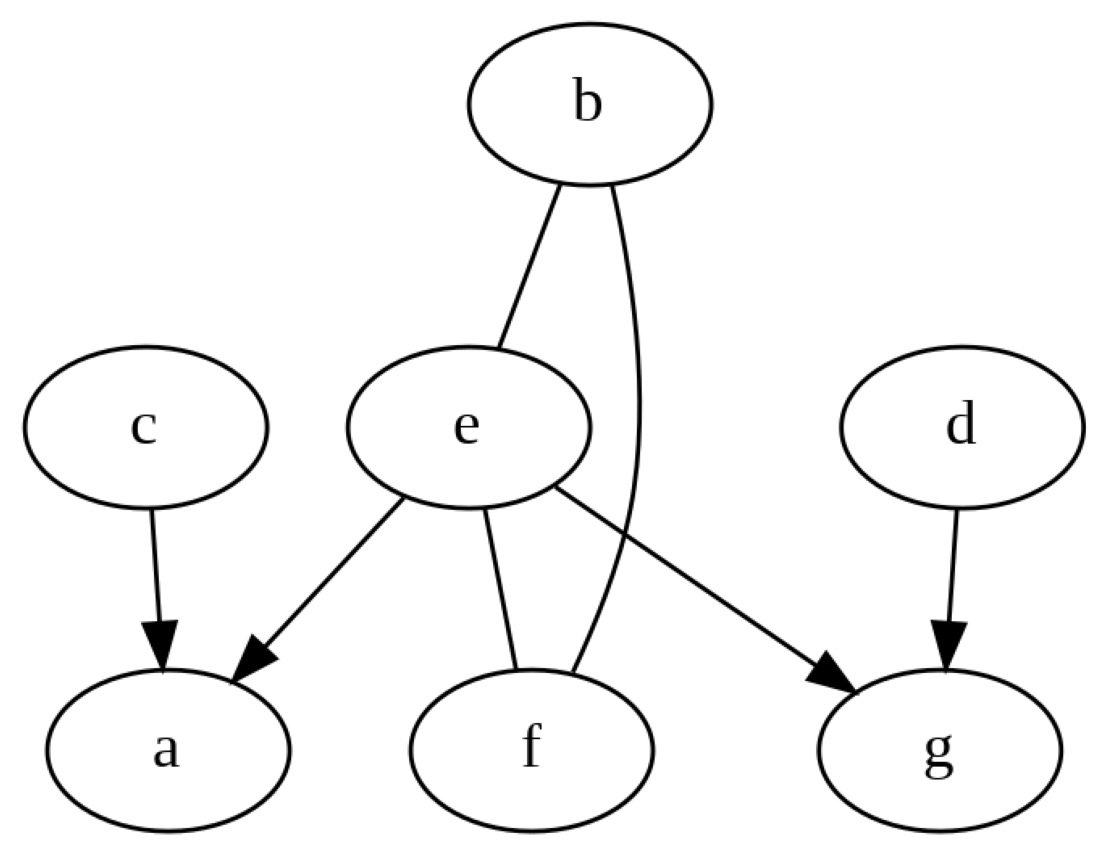

In [27]:
#alpha = 0.05

#convert input data into an array
df = data.values
columns = data.columns

cg = pc(df, 0.05, fisherz)
# visualization using pydot
cg.draw_pydot_graph(labels=columns)

#Q3

[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0 -1 -1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
[[ 0  0 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
[[ 0  0 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1  0]
 [-1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0 -1]
 [ 0 -1  0  0  0  0  0]
 [ 0  0  0  0  1  0  0]]
[[ 0  0 -1  0  0  0  0]
 [ 0  0  0  0 -1 -1  0]
 [-1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1]
 [ 0 -1  0  0  0  0 -1]
 [ 0 -1  0  0  0  0  0]
 [ 0  0  0  1  1  0  0]]
[[ 0  0  1  0  1  0  0]
 [ 0  0  0  0 -1 -1  0]
 [-1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1]
 [-1 -1  0  0  0  0 -1]
 [ 0 -1  0  0  0  0  0]
 [ 0  0  0 

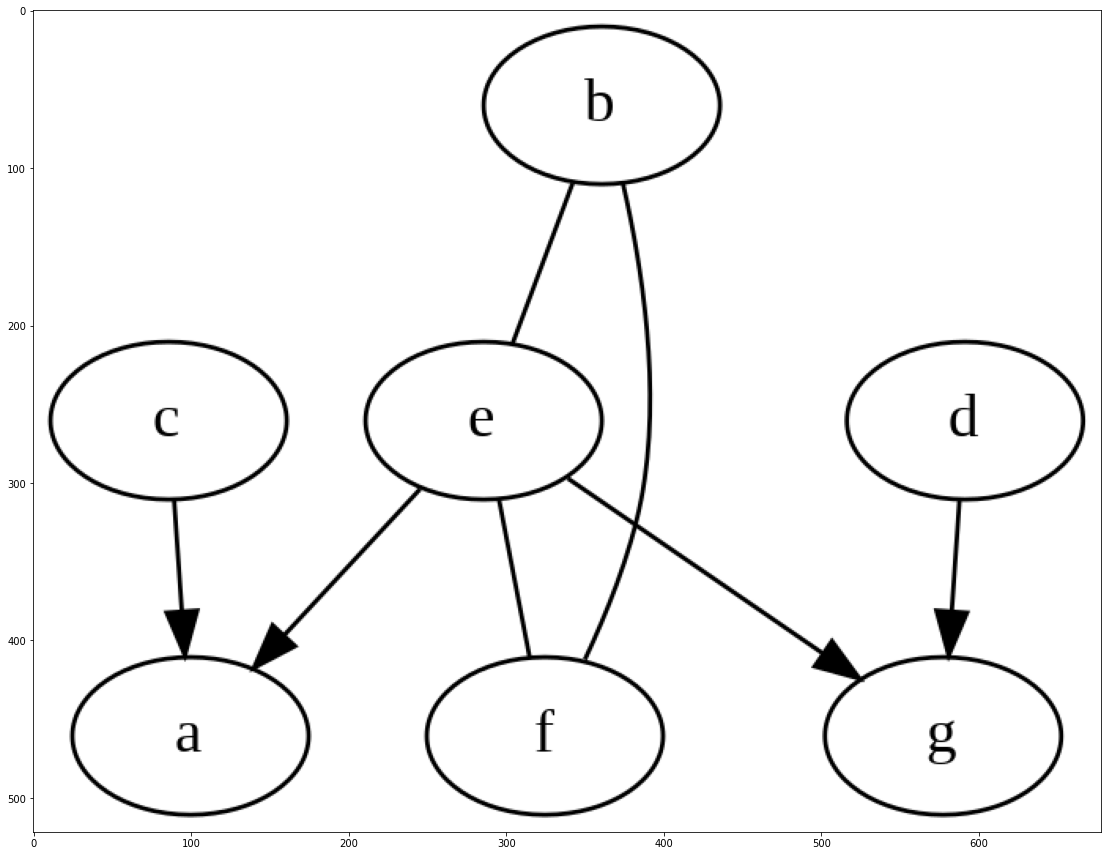

In [25]:
from causallearn.utils.GESUtils import local_score_BIC
from causallearn.search.ScoreBased.GES import ges
#from causallearn.score.LocalScoreFunction import local_score_bic

Record = ges(df, 'local_score_BIC')

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record['G'], labels=columns)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
#plt.axis('off')
plt.imshow(img)
plt.show()


#Q4

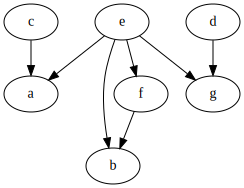

In [32]:
graph= CausalGraphicalModel(
    nodes = ['c','a','b','e','f','d','e','g'],
    edges = [('c','a'),('e','a'),('e','f'),('e','g'),('d','g'),('e','b'),('f','b')]
)
graph.draw()

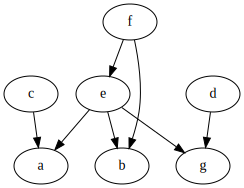

In [30]:
graph= CausalGraphicalModel(
    nodes = ['c','a','b','e','f','d','e','g'],
    edges = [('c','a'),('e','a'),('f','e'),('e','g'),('d','g'),('e','b'),('f','b')]
)
graph.draw()